In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhoste

Question 01

a.	Normally ’Fashion-MNIST’ in Keras is used for classification purposes. Typically, the objective is to identify (predict) different fashion products from the given images into predefined classes using various best possible models and algorithms and compare their results and performances to arrive at the best model.

b.	28 x 28 pixel

c.	60,000 images for the training set

d.	10,000 images for the testing set

e.	10 classes
•	T-shirt/top
•	Trouser
•	Pullover
•	Dress
•	Coat
•	Sandal
•	Shirt
•	Sneaker
•	Bag
•	Ankle boot


In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
# 2. Load that dataset directly from Keras using Python.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

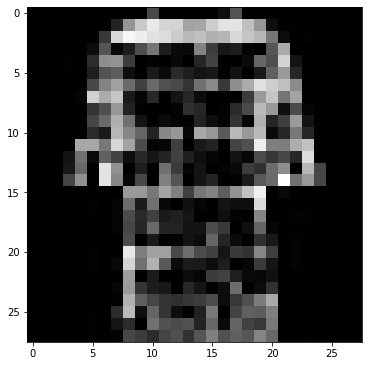

In [24]:
# 3. View some images in training data, for example draw the 11th image
#in your training data.
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.imshow(train_images[10], cmap='gray')
plt.show()

In [27]:
# 4. Normalize your data (train and test) between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [28]:
# 5. Now divide the training data into two: Validation images (first 5000
#images from the initial training data) and Training images (rest of the
#images in your initial training data).

validation_images = train_images[:5000]
validation_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

In [29]:
#6. Initialize the weight and bias parameters of your model.

weight_init = tf.keras.initializers.GlorotUniform()
bias_init = tf.keras.initializers.Zeros()

In [9]:
#7. Now build the neural network model with the following characteristics:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#9. Print the summary of the network.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Question 08 

a)	The Flatten layer is normally used to convert the input data (in here, is a 2D image representation) into a 1D array. It reshapes the input data from a matrix shape (28x28 pixels) into a vector shape (784 pixels). This allowed the data to be fed into the subsequent dense layers of the relevant neural network.

b)	The softmax activation function is normally used in the output layer of classification networks. Because of it provide a probability distribution over the different classes. This ensures that the predicted class probabilities sum up to 1. This is very important for multi-class classifications because this allows us to choose the class with the highest probability as the predicted class.


In [30]:
#10. Now compile the model with the desired loss function, optimizer and metrics.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#11. Now train your model on the training data and validate your model.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels))


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9152 - val_loss: 0.3111 - val_accuracy: 0.8948
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2090 - accuracy: 0.9194 - val_loss: 0.3670 - val_accuracy: 0.8770
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2026 - accuracy: 0.9227 - val_loss: 0.3329 - val_accuracy: 0.8902
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1964 - accuracy: 0.9249 - val_loss: 0.3295 - val_accuracy: 0.8958
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1888 - accuracy: 0.9272 - val_loss: 0.3374 - val_accuracy: 0.8912
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1813 - accuracy: 0.9304 - val_loss: 0.3577 - val_accuracy: 0.8912
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1782 - accuracy: 0.9324 - val_loss: 0.3225 - val_accuracy:

In [31]:
#12. Evaluate your model on the test data. What is the accuracy of your model on the test data?
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8932
Test accuracy: 0.8931999802589417


In [32]:
# 13. Now take the first five samples of test data. Print the actual target 
#classes and the predicted target classes of those five samples.
import numpy as np
predictions = model.predict(test_images[:5])
predicted_classes = [np.argmax(pred) for pred in predictions]

print("Actual target classes :")
print(test_labels[:5])

print("Predicted target classes :")
print(predicted_classes)

1/1 [==============================] - 0s 44ms/step
Actual target classes :
[9 2 1 1 6]
Predicted target classes :
[9, 2, 1, 1, 6]
